<center><font size="5"> TP 2 : Approximation des valeurs propres </font> </center>


Soient les matrices suivantes : 
$$
A_1 = \begin{pmatrix}
-4 & 14 & 0 \\
-3 & 13 & 0 \\
-1 & 0 & 2
\end{pmatrix}, \qquad
A_2 = \begin{pmatrix}
2 & 0 & 0 \\
0 & 0 & 0 \\
0 & -2 & 1
\end{pmatrix}, \qquad
A_3 = \begin{pmatrix}
2 & 1 & 0 \\
0 & 2 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

On rappelle l'algorithme suivant, vu en cours : 

<font size="3">**Algorithme : Méthode de la puissance**</font><br>
**Nécessite** : $A$ une matrice, $x_0$ un vecteur <br>
$\text{} \qquad k \leftarrow 0 $ <br>
$\text{} \qquad$ **Répéter** <br>
$\text{} \qquad \qquad x_{k+1} \leftarrow \frac{Ax_k}{\Vert Ax_k \Vert_2}$ <br>
$\text{} \qquad \qquad \lambda_{k+1} \leftarrow\ x_{k+1}^TAx_{k+1}$ <br>
$\text{} \qquad \qquad k \leftarrow k + 1$ <br>
$\text{} \qquad $ **jusqu'à convergence** <br>
**Retourne** $\lambda_{k+1}$, $x_{k+1}$ et $k$

Écrire une fonction <tt>puissance(A, x0, tol, itermax)</tt> dont les paramètres sont la matrice <tt>A</tt>, un vecteur initial <tt>x0</tt>, une tolérance <tt>tol</tt> et un nombre d’itérations maximal <tt>itermax</tt>. Cette fonction retourne la valeur propre de plus grand module, le vecteur propre associé et le nombre d’itérations nécessaires.

In [2]:
import numpy as np
from numpy import linalg as la
import matplotlib.image as img
import matplotlib.pyplot as plt

In [89]:
def puissance(A, x0,tol, itermax):
    k = 0
    tempX0 = x0
    x0 = A@x0/(la.norm(A@x0))
    tempLamb = tempX0.T@A@tempX0
    lamb = x0.T@A@x0
    while (k<itermax):
        tempX0 = x0
        x0 = A@x0/(la.norm(A@x0))
        tempLamb = tempX0.T@A@tempX0
        lamb = x0.T@A@x0
        k=k+1
    return lamb,x0,k

Proposer une autre condition de sortie pour la boucle des itérations et l'implémenter dans une fonction puissance2 similaire.

In [4]:
def puissance2(A, x0, tol, itermax):
    k = 0
    tempX0 = x0
    x0 = A@x0/(la.norm(A@x0))
    tempLamb = tempX0.T@A@tempX0
    lamb = x0.T@A@x0
    while (k<itermax and la.norm(tempX0-x0)>tol and la.norm(tempLamb-lamb)>tol):
        tempX0 = x0
        x0 = A@x0/(la.norm(A@x0))
        tempLamb = tempX0.T@A@tempX0
        lamb = x0.T@A@x0
        k=k+1
    return lamb,x0,k

Valider votre résultat en appliquant la fonction sur les matrices ci-dessus et en comparant les résultats à ceux obtenus en utilisant la fonction <tt>eig</tt> ou <tt>eigvals</tt> de <tt>Python</tt>.

In [5]:
A1 = np.array([[-4 ,14,0],[-3,13,0],[-1,0,2]])
x0 = np.array([1,2,3])
tol0 = 0.0001
itermax = 50
lamb1,x1,k = puissance2(A1,x0,tol0,itermax)
print(lamb1)
la.eigvals(A1)

10.000010001639135


array([ 2., 10., -1.])

In [92]:
A2 = np.array([[2,0,0],[0,0,0],[0,-2,1]])
x0 = np.array([1,2,3])
tol0 = 0.0001
itermax = 50
lamb1,x1,k = puissance2(A2,x0,tol0,itermax)
print(lamb1 ,x1, k)

la.eigvals(A2)

1.9999847414437646 [ 0.99999237  0.         -0.00390622] 7


array([2., 1., 0.])

In [94]:
A3 = np.array([[2,1,0],[0,2,0],[0,0,1]])
x00 = np.array([1,2,3])
tol00 = 0.0001
itermax = 50
lamb1,x1,k = puissance2(A3,x0,tol0,itermax)
print(lamb1,x1,k)
la.eigvals(A3)

2.0384047267355982 [9.99261175e-01 3.84331221e-02 2.56016022e-17] 50


array([2., 2., 1.])

Faire varier <tt>x0</tt> (et <tt>itermax</tt> lorsque c'est pertinent) et observer l'effet sur la convergence.

In [95]:
A3 = np.array([[-4,14,0],[0,0,0],[0,-2,0]])
x0 = np.array([2,10,3])
tol0 = 0.01
itermax = 50
lamb1,x1,k = puissance2(A3,x00,tol00,itermax)
print(lamb1,x1,k)

#Si on augmente itermax donc la methode de la puissannce converge encore plus et se rapproche

-4.0 [1. 0. 0.] 2


array([-4.,  0.,  0.])

Calculer la vitesse de convergence et la comparer avec la valeur théorique. La valeur théorique se calcule à 
partir du ratio des deux plus grandes valeurs propres du spectre à la puissance de l'itération. Tracer deux courbes représentant la convergence de votre algorithme (cva) et la convergence théorique (cvt).

In [134]:
A1 = np.array([[-4 ,14,0],[-3,13,0],[-1,0,2]])
tol = 0.01
itermax = 10
def valeurTheorique (SpectresTheoMat,SpectresApproMat,tol,itermax):
    MaxTheo = np.amax(la.eigvals(SpectresTheoMat))
    lamb1,x1,k = puissance(SpectresApproMat,np.array([1,2,3]),tol,itermax)
    return (lamb1/MaxTheo)**itermax
valeurTheorique(A1,A1,tol,itermax)

def vitesseConvergence(SpectresTheoMat,SpectresApproMat,tol,itermax):
    MaxTheo = np.amax(la.eigvals(SpectresTheoMat))
    lamb1,x1,k = puissance(SpectresApproMat,np.array([1,2,3]),tol,itermax)
    return lamb1/MaxTheo
print(vitesseConvergence(A1,A1,tol,itermax))
valeurTheorique(A1,A1,tol,itermax)

1.0000000016542907


1.0000000165429073

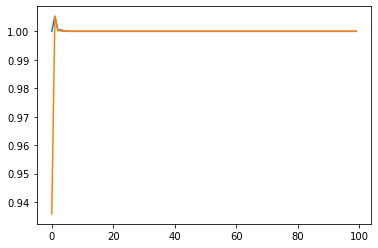

In [243]:
A1 = np.array([[-4 ,14,0],[-3,13,0],[-1,0,2]])
itermax =100
tol = 0.001
x = np.zeros(itermax)
y1 = np.zeros(itermax)
y2 = np.zeros(itermax)
for i in range (0,itermax):
    y1[i] =  valeurTheorique (A1,A1,tol,i)
    y2[i] =  vitesseConvergence(A1,A1,tol,i)
    x[i] = i
    
    
plt.plot(x,y1)
plt.plot(x,y2)


On rappelle l'algorithme suivant, vu en cours. Il ne s’agit ni plus ni moins que du précédent
algorithme appliqué à la matrice inverse (d’où son nom)

<font size="3">**Algorithme : Méthode de la puissance inverse**</font><br>
**Nécessite** : $A$ une matrice, $x_0$ un vecteur <br>
$\text{} \qquad k \leftarrow 0 $ <br>
$\text{} \qquad$ **Répéter** <br>
$\text{} \qquad \qquad x_{k+1} \leftarrow \frac{Ax_k}{\Vert Ax_k \Vert_2}$ <br>
$\text{} \qquad \qquad \lambda_{k+1} \leftarrow\ x_{k+1}^TAx_{k+1}$ <br>
$\text{} \qquad \qquad k \leftarrow k + 1$ <br>
$\text{} \qquad $ **jusqu'à convergence** <br>
**Retourne** $\lambda_{k+1}$, $x_{k+1}$ et $k$

Écrire une fonction <tt>puissanceInv(A, x0, tol, itermax)</tt> dont les paramètres sont la matrice <tt>A</tt>, un vecteur initial <tt>x0</tt>, une tolérance <tt>tol</tt> et un nombre d’itérations maximal <tt>itermax</tt>. Cette fonction retourne la valeur propre de plus grand module, le vecteur propre associé et le nombre d’itérations nécessaires.

In [176]:
def puissanceInv(A,x0,tol,itermax):
    
    k = 0
    tempX0 = x0
    x0 = la.inv(A)@x0 /(la.norm(la.inv(A)@x0))
    tempLamb = tempX0.T@A@tempX0
    lamb = x0.T@A@x0
    while (k<itermax and la.norm(tempX0 - x0) > tol and la.norm(tempLamb - lamb)> tol):
        tempX0 = x0
        x0 = la.inv(A)@x0 /(la.norm(la.inv(A)@x0))
        tempLamb = tempX0.T@A@tempX0
        lamb = x0.T@A@x0
    return lamb,x0,k
    

Valider votre résultat en appliquant la fonction sur les matrices ci-dessus et en comparant les résultats à ceux obtenus en utilisant la fonction <tt>eig</tt> ou <tt>eigvals</tt> de <tt>Python</tt>.

In [240]:
A = np.array([[-4 ,14,0],[-3,13,0],[-1,0,2]])
x00 = np.array([2,10,3])
tol = 0.0001
itermax =50
petiteValProAppro,x0,k = puissanceInv(A,x00,tol,itermax)

A2= la.eigvals(A)
min = la.norm(A2[0])
for i in range (len(A)):
    if (la.norm(A2[i])<min):
        min = la.norm(A2[i])

diff = la.norm(la.norm(petiteValProAppro) - min)
diff


2.0509148961678214e-05

Calculer la vitesse de convergence et la comparer avec la valeur théorique. Tracer deux courbes représentant la convergence et la convergence théorique.

In [241]:
A1 = np.array([[-4 ,14,0],[-3,13,0],[-1,0,2]])
tol = 0.001
itermax = 50
def valeurTheorique1 (SpectresTheoMat,SpectresApproMat,tol,itermax):
    A_aux = la.eigvals(SpectresTheoMat)
    for i in range (len(A_aux)):
        A_aux[i] = la.norm(A_aux[i])
    MaxTheo = np.amin(A_aux)
    lamb1,x1,k = puissanceInv(SpectresApproMat,np.array([2,10,3]),tol,itermax)
    return (lamb1/MaxTheo)**itermax

def vitesseConvergence1(SpectresTheoMat,SpectresApproMat,tol,itermax):
    A_aux = la.eigvals(SpectresTheoMat)
    for i in range (len(A_aux)):
        A_aux[i] = la.norm(A_aux[i])
    MaxTheo = np.amin(A_aux)
    lamb1,x1,k = puissanceInv(SpectresApproMat,np.array([2,10,3]),tol,itermax)
    return lamb1/MaxTheo


In [224]:
valeurTheorique1(A1,A1,tol,itermax)

0.9847319600506449

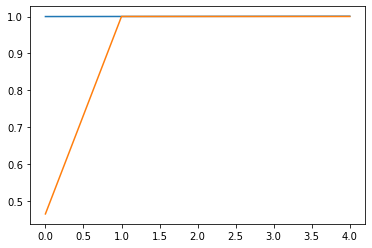

In [244]:
A1 = np.array([[-5 ,14,0],[-3,13,0],[-1,0,2]])
itermax =5
tol = 0.001
x = np.zeros(itermax)
y1 = np.zeros(itermax)
y2 = np.zeros(itermax)
for i in range (0,itermax):
    y1[i] =  valeurTheorique1 (A1,A1,tol,i)
    y2[i] =  vitesseConvergence1(A1,A1,tol,i)
    x[i] = i

plt.plot(x,y1)
plt.plot(x,y2)
